# Example 15 - Three Point Problem



This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 1187 m wide (W-E extent) and 1479 m high (N-S extent). The vertical model extent varies between 100 m and 300 m. This example represents a classic "three-point-problem" of planar dipping layers (green and yellow) above an unspecified basement (purple) which are separated by a fault (blue). The interface points were not recorded at the surface but rather in boreholes at depth. The fault has an offset of 20 m but no further interface points are located beyond the fault. This will be dealt with in a two model approach.

The map has been georeferenced with QGIS. The outcrops of the layers were digitized in QGIS. The contour lines were also digitized and will be interpolated with `GemGIS` to create a topography for the model. 

Map Source: An Introduction to Geological Structures and Maps by G.M. Bennison

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/cover_example15.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip or conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries and loading Data

All remaining packages can be loaded in order to prepare the data and to construct the model. The example data is downloaded from an external server using `pooch`. It will be stored in a data folder in the same directory where this notebook is stored.  

In [3]:
import geopandas as gpd
import rasterio 

In [4]:
file_path = 'data/example15/'
gg.download_gemgis_data.download_tutorial_data(filename="example15_three_point_problem.zip", dirpath=file_path)

## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by interpolating contour lines digitized from the georeferenced map using the `SciPy` Radial Basis Function interpolation wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/dem_example15.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [6]:
topo = gpd.read_file(file_path + 'topo15.shp')
topo.head()

id    Z                                           geometry
0  None  180  LINESTRING (608.177 -0.021, 598.911 22.516, 58...
1  None  190  LINESTRING (323.662 216.425, 321.832 254.178, ...
2  None  200  LINESTRING (142.794 190.113, 153.433 227.980, ...
3  None  250  LINESTRING (1.395 1193.695, 20.385 1232.592, 3...
4  None  240  LINESTRING (1.623 925.311, 8.487 939.039, 13.7...

### Interpolating the contour lines

In [7]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=5)

### Plotting the raster

(0.0, 1479.0)

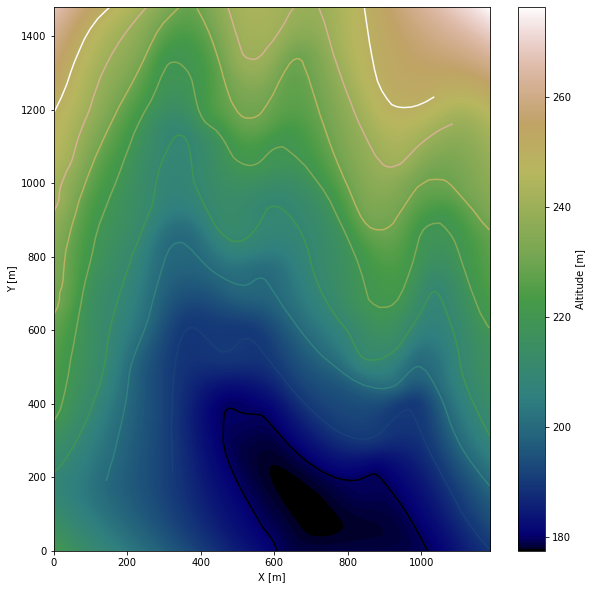

In [8]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 1187, 0, 1479], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 1187)
ax.set_ylim(0, 1479)

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [9]:
topo_raster = rasterio.open(file_path + 'raster15.tif')

## Interface Points of stratigraphic boundaries

The interface points for this three point example will be digitized as points with the respective height value as given by the borehole information and the respective formation.  


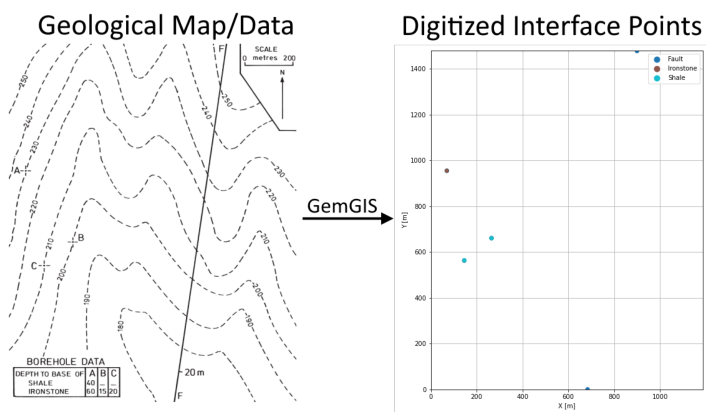

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/interfaces_example15.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [11]:
interfaces = gpd.read_file(file_path + 'interfaces15.shp')
interfaces.head()

id  formation    Z                 geometry
0  None      Shale  190   POINT (69.806 954.941)
1  None  Ironstone  170   POINT (69.806 954.941)
2  None  Ironstone  190  POINT (145.769 562.774)
3  None  Ironstone  185  POINT (264.746 660.701)
4  None      Shale  210  POINT (146.226 563.346)

### Extracting Z coordinate from Digital Elevation Model

In [12]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=None)
interfaces_coords

formation      Z                 geometry      X      Y
0      Shale 190.00   POINT (69.806 954.941)  69.81 954.94
1  Ironstone 170.00   POINT (69.806 954.941)  69.81 954.94
2  Ironstone 190.00  POINT (145.769 562.774) 145.77 562.77
3  Ironstone 185.00  POINT (264.746 660.701) 264.75 660.70
4      Shale 210.00  POINT (146.226 563.346) 146.23 563.35
5      Shale 205.00  POINT (264.746 660.701) 264.75 660.70

In [13]:
fault = gpd.read_file(file_path + 'fault15.shp')
fault = gg.vector.extract_xyz(gdf=fault, dem=topo_raster)
fault

formation                  geometry      X       Y      Z
0     Fault     POINT (683.911 0.608) 683.91    0.61 178.76
1     Fault  POINT (899.671 1477.524) 899.67 1477.52 254.62

In [14]:
import pandas as pd

interfaces_coords = pd.concat([interfaces_coords, fault]).reset_index()
interfaces_coords

index  formation      Z                  geometry      X       Y
0      0      Shale 190.00    POINT (69.806 954.941)  69.81  954.94
1      1  Ironstone 170.00    POINT (69.806 954.941)  69.81  954.94
2      2  Ironstone 190.00   POINT (145.769 562.774) 145.77  562.77
3      3  Ironstone 185.00   POINT (264.746 660.701) 264.75  660.70
4      4      Shale 210.00   POINT (146.226 563.346) 146.23  563.35
5      5      Shale 205.00   POINT (264.746 660.701) 264.75  660.70
6      0      Fault 178.76     POINT (683.911 0.608) 683.91    0.61
7      1      Fault 254.62  POINT (899.671 1477.524) 899.67 1477.52

### Plotting the Interface Points

(0.0, 1479.0)

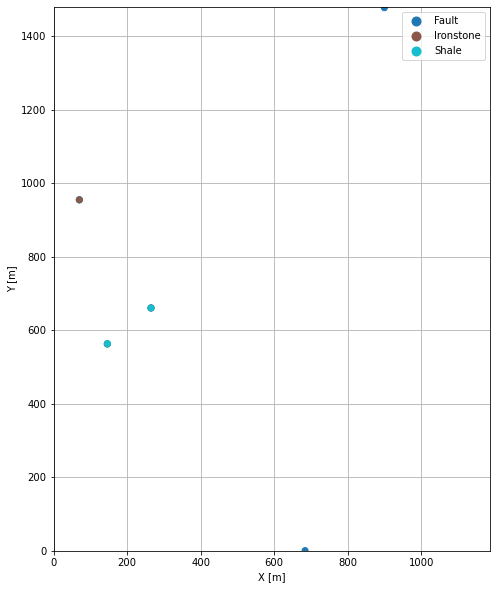

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 1187)
ax.set_ylim(0, 1479)

## Orientations from Strike Lines

For this three point example, an orientation is calculated using `gg.vector.calculate_orientation_for_three_point_problem()`. 


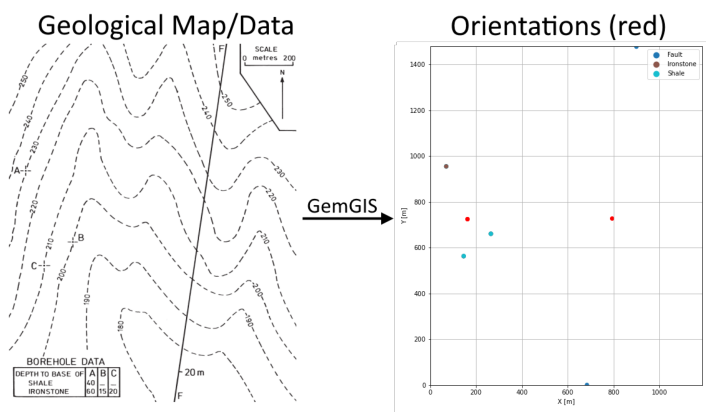

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/orientations_example15.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [17]:
orientations1 = gpd.read_file(file_path + 'interfaces15.shp')
orientations1 = orientations1[orientations1['formation']=='Ironstone']
orientations1

id  formation    Z                 geometry
1  None  Ironstone  170   POINT (69.806 954.941)
2  None  Ironstone  190  POINT (145.769 562.774)
3  None  Ironstone  185  POINT (264.746 660.701)

In [18]:
orientations1 = gg.vector.calculate_orientation_for_three_point_problem(gdf=orientations1)
orientations1

Z  formation azimuth    dip polarity      X      Y  \
0 181.67  Ironstone -179.95 177.08        1 160.11 726.14   

                  geometry  
0  POINT (160.107 726.139)

### Changing the Data Type of Fields

In [19]:
orientations1['Z'] = orientations1['Z'].astype(float)
orientations1['azimuth'] = orientations1['azimuth'].astype(float)
orientations1['dip'] = orientations1['dip'].astype(float)
orientations1['dip'] = 180 - orientations1['dip']
orientations1['azimuth'] = 180 - orientations1['azimuth']
orientations1['polarity'] = orientations1['polarity'].astype(float)
orientations1['X'] = orientations1['X'].astype(float)
orientations1['Y'] = orientations1['Y'].astype(float)
orientations1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Z          1 non-null      float64 
 1   formation  1 non-null      object  
 2   azimuth    1 non-null      float64 
 3   dip        1 non-null      float64 
 4   polarity   1 non-null      float64 
 5   X          1 non-null      float64 
 6   Y          1 non-null      float64 
 7   geometry   1 non-null      geometry
dtypes: float64(6), geometry(1), object(1)
memory usage: 192.0+ bytes


In [20]:
orientations2 = gpd.read_file(file_path + 'interfaces15.shp')
orientations2 = orientations2[orientations2['formation']=='Shale']
orientations2

id formation    Z                 geometry
0  None     Shale  190   POINT (69.806 954.941)
4  None     Shale  210  POINT (146.226 563.346)
5  None     Shale  205  POINT (264.746 660.701)

In [21]:
orientations2 = gg.vector.calculate_orientation_for_three_point_problem(gdf=orientations2)
orientations2

Z formation azimuth    dip polarity      X      Y  \
0 201.67     Shale -179.77 177.07        1 160.26 726.33   

                  geometry  
0  POINT (160.259 726.329)

### Changing the Data Type of Fields

In [22]:
orientations2['Z'] = orientations2['Z'].astype(float)
orientations2['azimuth'] = orientations2['azimuth'].astype(float)
orientations2['dip'] = orientations2['dip'].astype(float)
orientations2['dip'] = 180 - orientations2['dip']
orientations2['azimuth'] = 180 - orientations2['azimuth']
orientations2['polarity'] = orientations2['polarity'].astype(float)
orientations2['X'] = orientations2['X'].astype(float)
orientations2['Y'] = orientations2['Y'].astype(float)
orientations2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Z          1 non-null      float64 
 1   formation  1 non-null      object  
 2   azimuth    1 non-null      float64 
 3   dip        1 non-null      float64 
 4   polarity   1 non-null      float64 
 5   X          1 non-null      float64 
 6   Y          1 non-null      float64 
 7   geometry   1 non-null      geometry
dtypes: float64(6), geometry(1), object(1)
memory usage: 192.0+ bytes


In [23]:
orientations_fault = gpd.read_file(file_path + 'orientations15_fault.shp')
orientations_fault = gg.vector.extract_xyz(gdf=orientations_fault, dem=topo_raster)
orientations_fault

formation   dip  azimuth  polarity                 geometry      X      Y  \
0     Fault 90.00   280.00      1.00  POINT (792.591 727.511) 792.59 727.51   

       Z  
0 215.87

### Merging Orientations

In [24]:
orientations = pd.concat([orientations1, orientations2, orientations_fault]).reset_index()
orientations

index      Z  formation  azimuth   dip  polarity      X      Y  \
0      0 181.67  Ironstone   359.95  2.92      1.00 160.11 726.14   
1      0 201.67      Shale   359.77  2.93      1.00 160.26 726.33   
2      0 215.87      Fault   280.00 90.00      1.00 792.59 727.51   

                  geometry  
0  POINT (160.107 726.139)  
1  POINT (160.259 726.329)  
2  POINT (792.591 727.511)

### Plotting the Orientations

Text(179.77829589465532, 0.5, 'Y [m]')

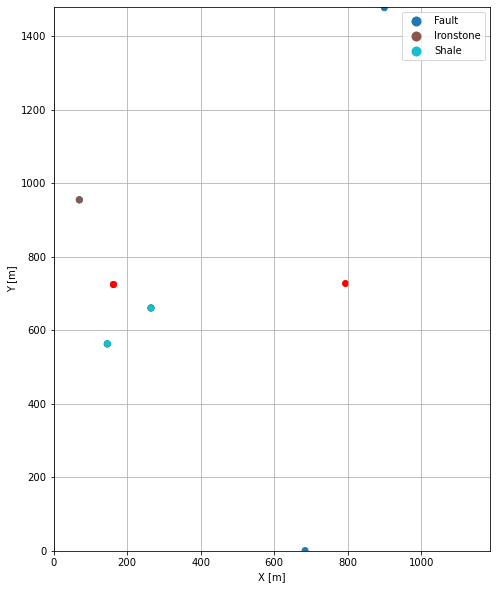

In [25]:
fig, ax = plt.subplots(1, figsize=(10,10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
plt.xlim(0,1187)
plt.ylim(0,1479)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

## GemPy Model Construction (Part A)

The structural geological model will be constructed using the `GemPy` package. The first model is calculated without the fault. 

In [26]:
import gempy as gp

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Creating New Model

In [27]:
geo_model = gp.create_model('Model15a')
geo_model

Model15a  2021-04-27 08:08

### Initiate Data

The fault interfaces and orientations will be removed from the first model to model the layers also beyond the fault. As the information is provided that the fault has an offset of 20 m, the layers will be exported, the boundaries will be digitized and the elevation will be reduced by 20 m. 

In [28]:
interfaces_coords_new=interfaces_coords[interfaces_coords['formation'] != 'Fault']
interfaces_coords_new

index  formation      Z                 geometry      X      Y
0      0      Shale 190.00   POINT (69.806 954.941)  69.81 954.94
1      1  Ironstone 170.00   POINT (69.806 954.941)  69.81 954.94
2      2  Ironstone 190.00  POINT (145.769 562.774) 145.77 562.77
3      3  Ironstone 185.00  POINT (264.746 660.701) 264.75 660.70
4      4      Shale 210.00  POINT (146.226 563.346) 146.23 563.35
5      5      Shale 205.00  POINT (264.746 660.701) 264.75 660.70

In [29]:
orientations_new=orientations[orientations['formation'] != 'Fault']
orientations_new

index      Z  formation  azimuth  dip  polarity      X      Y  \
0      0 181.67  Ironstone   359.95 2.92      1.00 160.11 726.14   
1      0 201.67      Shale   359.77 2.93      1.00 160.26 726.33   

                  geometry  
0  POINT (160.107 726.139)  
1  POINT (160.259 726.329)

In [30]:
gp.init_data(geo_model, [0, 1187, 0, 1479, 100, 300], [100, 100, 100],
             surface_points_df=interfaces_coords_new[interfaces_coords_new['Z'] != 0],
             orientations_df=orientations_new,
             default_values=True)

Active grids: ['regular']


Model15a  2021-04-27 08:08

### Model Surfaces

In [31]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0      Shale  Default series               1  #015482   1
1  Ironstone  Default series               2  #9f0052   2

### Mapping the Stack to Surfaces

In [32]:
gp.map_stack_to_surfaces(geo_model,
                         {
                          'Strata1': ('Shale', 'Ironstone'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')

surface   series  order_surfaces    color  id
0      Shale  Strata1               1  #015482   1
1  Ironstone  Strata1               2  #9f0052   2
2   Basement  Strata1               3  #ffbe00   3

### Showing the Number of Data Points

In [33]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

surface   series  order_surfaces    color  id  No. of Interfaces  No. of Orientations
0      Shale  Strata1               1  #015482   1                  3                    1
1  Ironstone  Strata1               2  #9f0052   2                  3                    1
2   Basement  Strata1               3  #ffbe00   3                  0                    0

### Loading Digital Elevation Model

In [34]:
geo_model.set_topography(
    source='gdal', filepath=file_path + 'raster15.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   5.935     ,    7.395     ,  101.        ],
       [   5.935     ,    7.395     ,  103.        ],
       [   5.935     ,    7.395     ,  105.        ],
       ...,
       [1184.49578059, 1466.50844595,  275.3008728 ],
       [1184.49578059, 1471.50506757,  275.80532837],
       [1184.49578059, 1476.50168919,  276.31124878]])

### Plotting Input Data

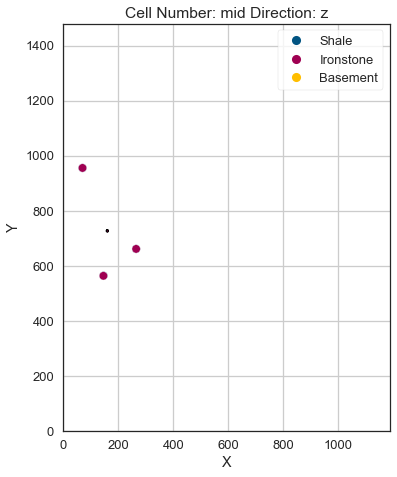

In [35]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

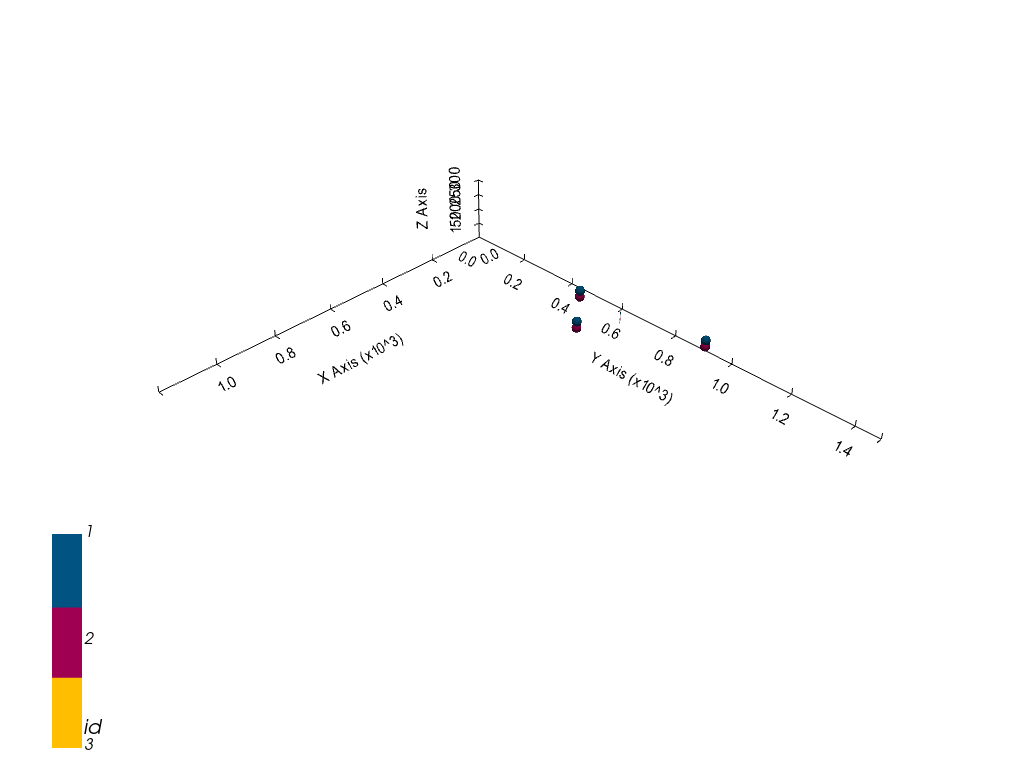

In [36]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

### Setting the Interpolator

In [37]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1906.94
$C_o$           86581.19
drift equations      [3]


### Computing Model

In [38]:
sol = gp.compute_model(geo_model, compute_mesh=True)

### Plotting Cross Sections

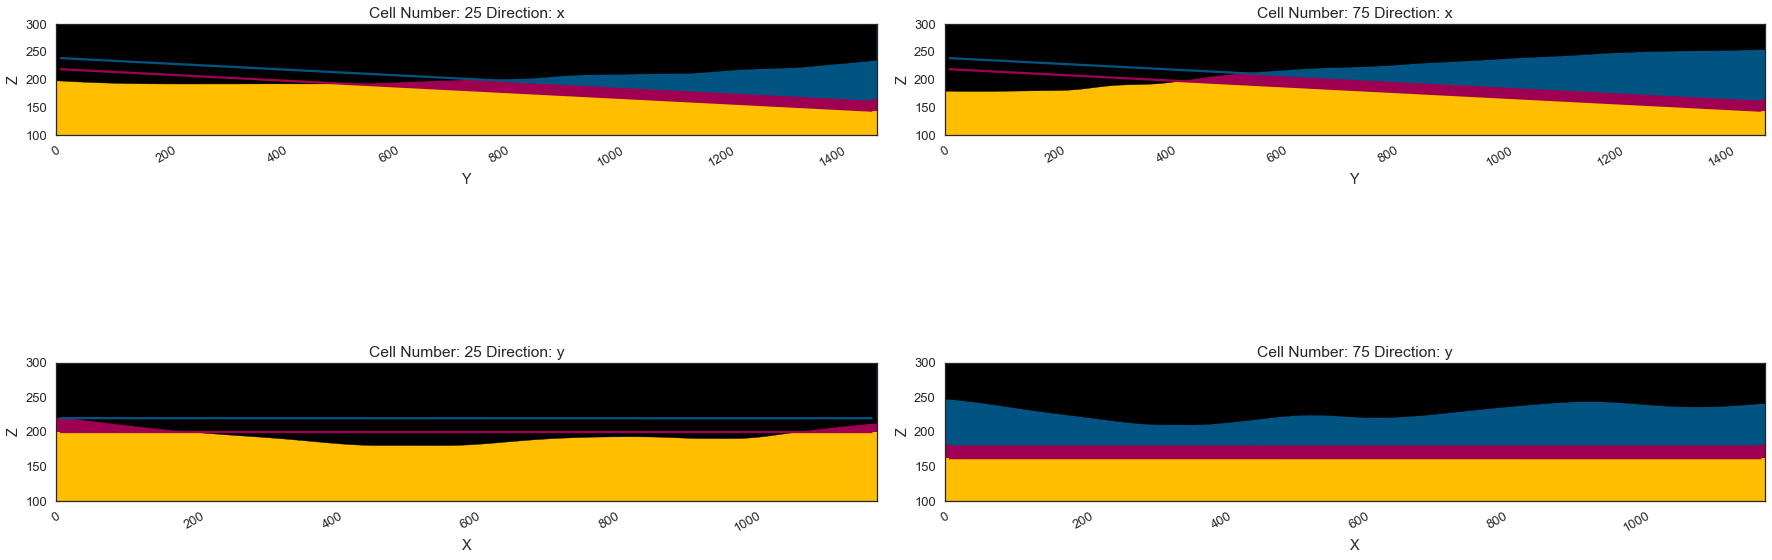

In [39]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], show_topography=True, show_data=False)

### Plotting 3D Model

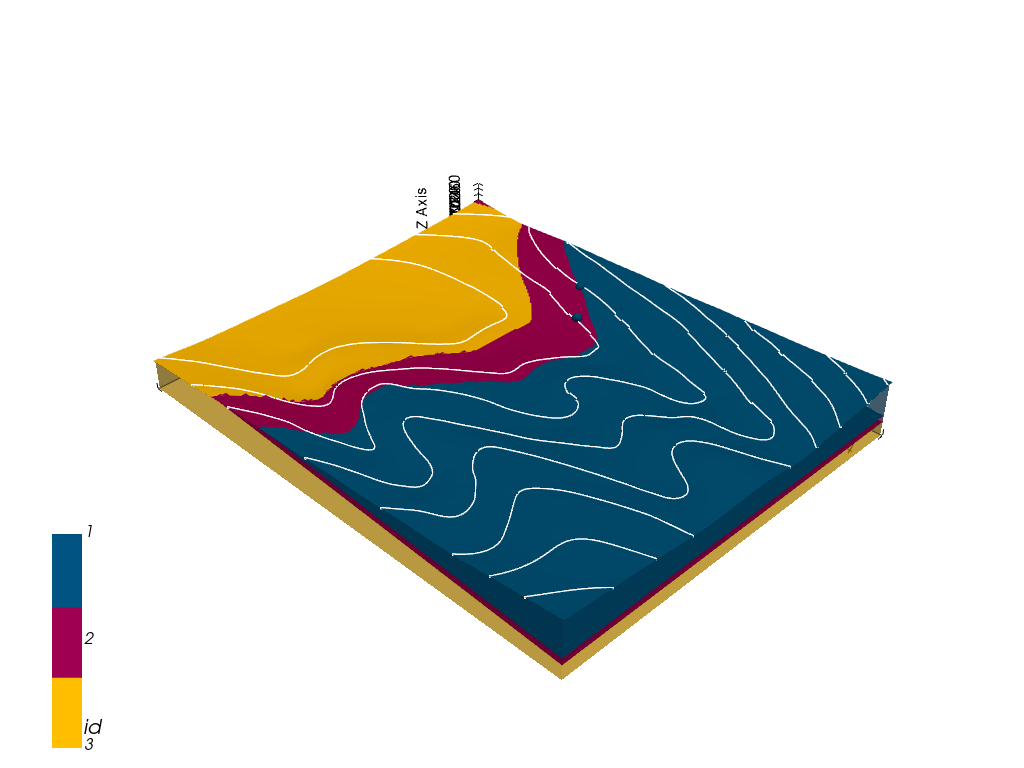

In [40]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

### Creating Polygons from GemPy Model

A GeoDataFrame containing polygons representing the geological map can be created using `gg.post.extract_lithologies()`. This data is now being saved and the constructed layer boundaries beyond the fault in the east are being digitized. Their elevation values will be reduced by 20 m to simulate the offset of the fault. The model will then be recalculated again.

In [41]:
gdf = gg.post.extract_lithologies(geo_model, [0, 1187, 0, 1479], 'EPSG:4326')
gdf

formation                                           geometry
0   Basement  POLYGON ((22.538 3.254, 22.804 2.498, 27.546 2...
1  Ironstone  POLYGON ((7.513 2.498, 12.521 2.498, 17.530 2....
2  Ironstone  POLYGON ((5.851 192.370, 7.513 194.147, 10.887...
3      Shale  POLYGON ((4.134 362.255, 7.513 365.081, 10.021...

In [42]:
gdf = gpd.read_file(file_path + 'geolmap.shp')
gdf

formation                                           geometry
0  Conglomerate  POLYGON ((22.538 3.254, 21.064 7.495, 19.356 1...
1     Ironstone  POLYGON ((7.513 2.498, 2.504 2.498, 2.504 7.49...
2     Ironstone  POLYGON ((5.851 192.370, 2.504 188.069, 2.504 ...
3         Shale  POLYGON ((4.134 362.255, 2.504 360.939, 2.504 ...

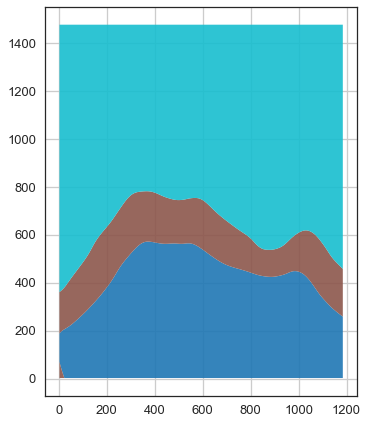

In [43]:
gdf.plot(column='formation',  alpha=0.9, aspect='equal')
plt.grid()

### Preparing Interfaces beyond the fault

In [44]:
interfaces_beyond_fault =  gpd.read_file(file_path + 'interfaces15_beyond_fault.shp')
interfaces_beyond_fault = gg.vector.extract_xyz(gdf=interfaces_beyond_fault, dem=topo_raster)
interfaces_beyond_fault

formation                  geometry       X      Y      Z
0        Shale   POINT (778.812 601.522)  778.81 601.52 208.06
1        Shale   POINT (783.821 597.991)  783.82 597.99 208.15
2        Shale   POINT (788.829 594.245)  788.83 594.25 208.26
3        Shale   POINT (791.557 592.100)  791.56 592.10 208.71
4        Shale   POINT (797.430 587.103)  797.43 587.10 208.89
..         ...                       ...     ...    ...    ...
250  Ironstone  POINT (1169.470 270.001) 1169.47 270.00 205.13
251  Ironstone  POINT (1172.985 267.319) 1172.99 267.32 205.24
252  Ironstone  POINT (1174.479 266.187) 1174.48 266.19 205.24
253  Ironstone  POINT (1179.487 262.439) 1179.49 262.44 205.33
254  Ironstone  POINT (1184.496 258.751) 1184.50 258.75 205.42

[255 rows x 5 columns]

### Substracting the fault offset

In [45]:
interfaces_beyond_fault['Z']=interfaces_beyond_fault['Z']-20
interfaces_beyond_fault

formation                  geometry       X      Y      Z
0        Shale   POINT (778.812 601.522)  778.81 601.52 188.06
1        Shale   POINT (783.821 597.991)  783.82 597.99 188.15
2        Shale   POINT (788.829 594.245)  788.83 594.25 188.26
3        Shale   POINT (791.557 592.100)  791.56 592.10 188.71
4        Shale   POINT (797.430 587.103)  797.43 587.10 188.89
..         ...                       ...     ...    ...    ...
250  Ironstone  POINT (1169.470 270.001) 1169.47 270.00 185.13
251  Ironstone  POINT (1172.985 267.319) 1172.99 267.32 185.24
252  Ironstone  POINT (1174.479 266.187) 1174.48 266.19 185.24
253  Ironstone  POINT (1179.487 262.439) 1179.49 262.44 185.33
254  Ironstone  POINT (1184.496 258.751) 1184.50 258.75 185.42

[255 rows x 5 columns]

### Mergin old and new interfaces

In [46]:
interfaces_coords = pd.concat([interfaces_coords, interfaces_beyond_fault.sample(n=50)]).reset_index()
interfaces_coords

level_0  index  formation      Z                  geometry       X       Y
0         0   0.00      Shale 190.00    POINT (69.806 954.941)   69.81  954.94
1         1   1.00  Ironstone 170.00    POINT (69.806 954.941)   69.81  954.94
2         2   2.00  Ironstone 190.00   POINT (145.769 562.774)  145.77  562.77
3         3   3.00  Ironstone 185.00   POINT (264.746 660.701)  264.75  660.70
4         4   4.00      Shale 210.00   POINT (146.226 563.346)  146.23  563.35
5         5   5.00      Shale 205.00   POINT (264.746 660.701)  264.75  660.70
6         6   0.00      Fault 178.76     POINT (683.911 0.608)  683.91    0.61
7         7   1.00      Fault 254.62  POINT (899.671 1477.524)  899.67 1477.52
8       148    NaN  Ironstone 176.62   POINT (818.880 435.743)  818.88  435.74
9        54    NaN      Shale 189.01   POINT (969.133 585.269)  969.13  585.27
10       76    NaN      Shale 187.20  POINT (1040.618 617.083) 1040.62  617.08
11      103    NaN      Shale 190.69  POINT (1109.369 550.239) 1109.37  550.24
12      127    NaN      Shale 194.60  POINT (1169.470 472.641) 1169.47  472.64
13      101    NaN      Shale 190.28  POINT (1104.554 557.123) 1104.55  557.12
14      163    NaN  Ironstone 176.73   POINT (883.989 424.482)  883.99  424.48
15      154    NaN  Ironstone 176.62   POINT (843.922 429.090)  843.92  429.09
16      223    NaN  Ironstone 181.17  POINT (1095.068 342.269) 1095.07  342.27
17      153    NaN  Ironstone 176.99   POINT (838.914 430.150)  838.91  430.15
18       72    NaN      Shale 187.15  POINT (1024.226 617.960) 1024.23  617.96
19      120    NaN      Shale 193.19  POINT (1146.376 497.164) 1146.38  497.16
20      157    NaN  Ironstone 176.90   POINT (854.900 427.211)  854.90  427.21
21      181    NaN  Ironstone 176.12   POINT (969.133 446.025)  969.13  446.03
22      242    NaN  Ironstone 184.02  POINT (1144.428 290.559) 1144.43  290.56
23      217    NaN  Ironstone 180.62  POINT (1083.408 357.258) 1083.41  357.26
24       78    NaN      Shale 187.32  POINT (1049.268 613.959) 1049.27  613.96
25      166    NaN  Ironstone 177.34   POINT (899.015 425.295)  899.01  425.29
26      175    NaN  Ironstone 176.70   POINT (944.091 435.932)  944.09  435.93
27      104    NaN      Shale 190.58  POINT (1111.511 547.130) 1111.51  547.13
28      164    NaN  Ironstone 176.71   POINT (888.998 424.536)  889.00  424.54
29       68    NaN      Shale 187.36  POINT (1009.200 613.234) 1009.20  613.23
30       62    NaN      Shale 188.08   POINT (990.075 602.093)  990.08  602.09
31       61    NaN      Shale 188.08   POINT (989.167 601.497)  989.17  601.50
32       90    NaN      Shale 188.56  POINT (1081.508 587.103) 1081.51  587.10
33      233    NaN  Ironstone 183.05  POINT (1122.155 312.289) 1122.16  312.29
34      228    NaN  Ironstone 182.16  POINT (1109.369 326.071) 1109.37  326.07
35       53    NaN      Shale 189.23   POINT (965.782 582.106)  965.78  582.11
36      173    NaN  Ironstone 176.58   POINT (932.635 432.208)  932.63  432.21
37        2    NaN      Shale 188.26   POINT (788.829 594.245)  788.83  594.25
38      172    NaN  Ironstone 176.90   POINT (929.065 431.235)  929.07  431.24
39      118    NaN      Shale 193.30  POINT (1142.213 502.160) 1142.21  502.16
40       36    NaN      Shale 191.07   POINT (909.232 542.133)  909.23  542.13
41      209    NaN  Ironstone 178.98  POINT (1064.293 384.655) 1064.29  384.65
42      128    NaN      Shale 194.85  POINT (1174.479 467.636) 1174.48  467.64
43      119    NaN      Shale 193.19  POINT (1144.428 499.461) 1144.43  499.46
44      207    NaN  Ironstone 178.75  POINT (1059.285 391.849) 1059.28  391.85
45      218    NaN  Ironstone 180.62  POINT (1084.327 355.992) 1084.33  355.99
46      206    NaN  Ironstone 178.75  POINT (1059.017 392.235) 1059.02  392.23
47       86    NaN      Shale 188.43  POINT (1072.237 597.096) 1072.24  597.10
48      212    NaN  Ironstone 179.93  POINT (1072.891 372.248) 1072.89  372.25
49      136    NaN  Ironstone 175.82   POINT (773.804 

## GemPy Model Construction (Part B)

The structural geological model will be constructed using the `GemPy` package. 

In [47]:
import gempy as gp

### Creating new Model

In [48]:
geo_model = gp.create_model('Model15b')
geo_model

Model15b  2021-04-27 08:08

### Initiate Data


In [49]:
gp.init_data(geo_model, [0, 1187, 0, 1479, 100, 300], [100, 100, 100],
             surface_points_df=interfaces_coords[interfaces_coords['Z'] != 0],
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model15b  2021-04-27 08:08

### Model Surfaces

In [50]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0      Shale  Default series               1  #015482   1
1  Ironstone  Default series               2  #9f0052   2
2      Fault  Default series               3  #ffbe00   3

### Mapping the Stack to Surfaces

In [51]:
gp.map_stack_to_surfaces(geo_model,
                         {
                          'Fault1' : ('Fault'),
                          'Strata1': ('Shale', 'Ironstone'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')
geo_model.set_is_fault(['Fault1'])

Fault colors changed. If you do not like this behavior, set change_color to False.


order_series BottomRelation  isActive  isFault  isFinite
Fault1              1          Fault      True     True     False
Strata1             2        Erosion      True    False     False

### Showing the Number of Data Points

In [52]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

surface   series  order_surfaces    color  id  No. of Interfaces  No. of Orientations
2      Fault   Fault1               1  #527682   1                  2                    1
0      Shale  Strata1               1  #9f0052   2                 27                    1
1  Ironstone  Strata1               2  #ffbe00   3                 29                    1
3   Basement  Strata1               3  #728f02   4                  0                    0

### Loading Digital Elevation Model

In [53]:
geo_model.set_topography(
    source='gdal', filepath=file_path + 'raster15.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   5.935     ,    7.395     ,  101.        ],
       [   5.935     ,    7.395     ,  103.        ],
       [   5.935     ,    7.395     ,  105.        ],
       ...,
       [1184.49578059, 1466.50844595,  275.3008728 ],
       [1184.49578059, 1471.50506757,  275.80532837],
       [1184.49578059, 1476.50168919,  276.31124878]])

### Plotting Input Data

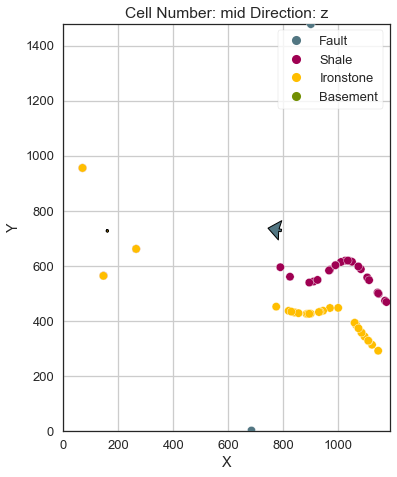

In [54]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

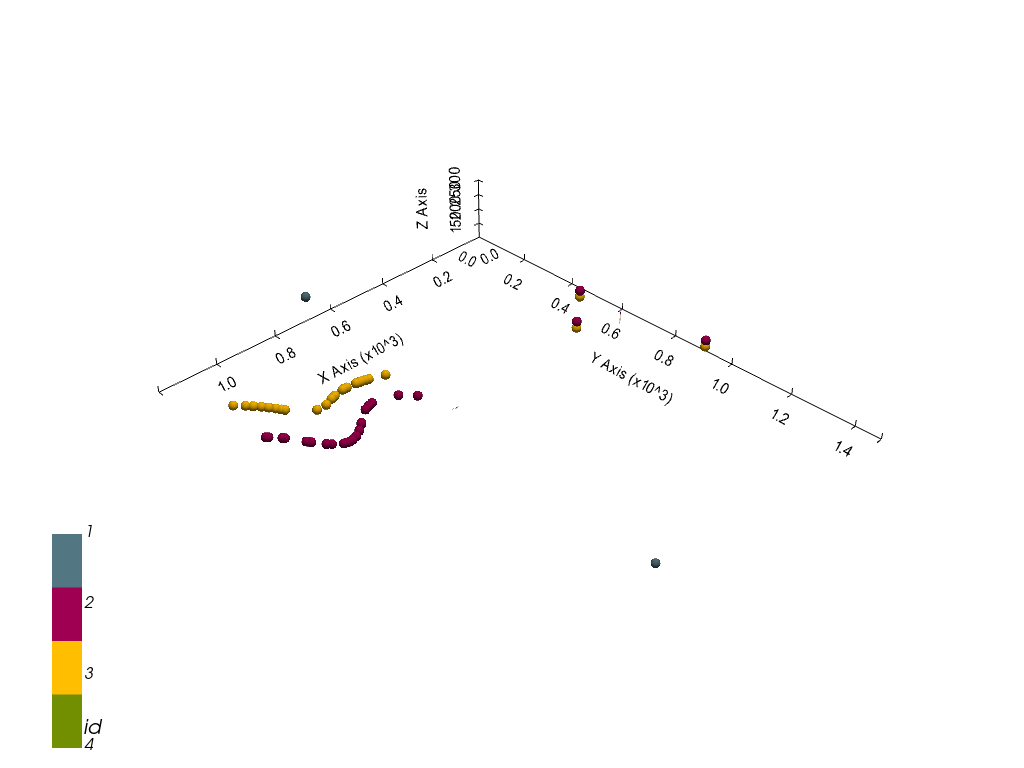

In [55]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

### Setting the Interpolator

In [56]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            1906.94
$C_o$           86581.19
drift equations   [3, 3]


### Computing Model

In [57]:
sol = gp.compute_model(geo_model, compute_mesh=True)

### Plotting Cross Sections

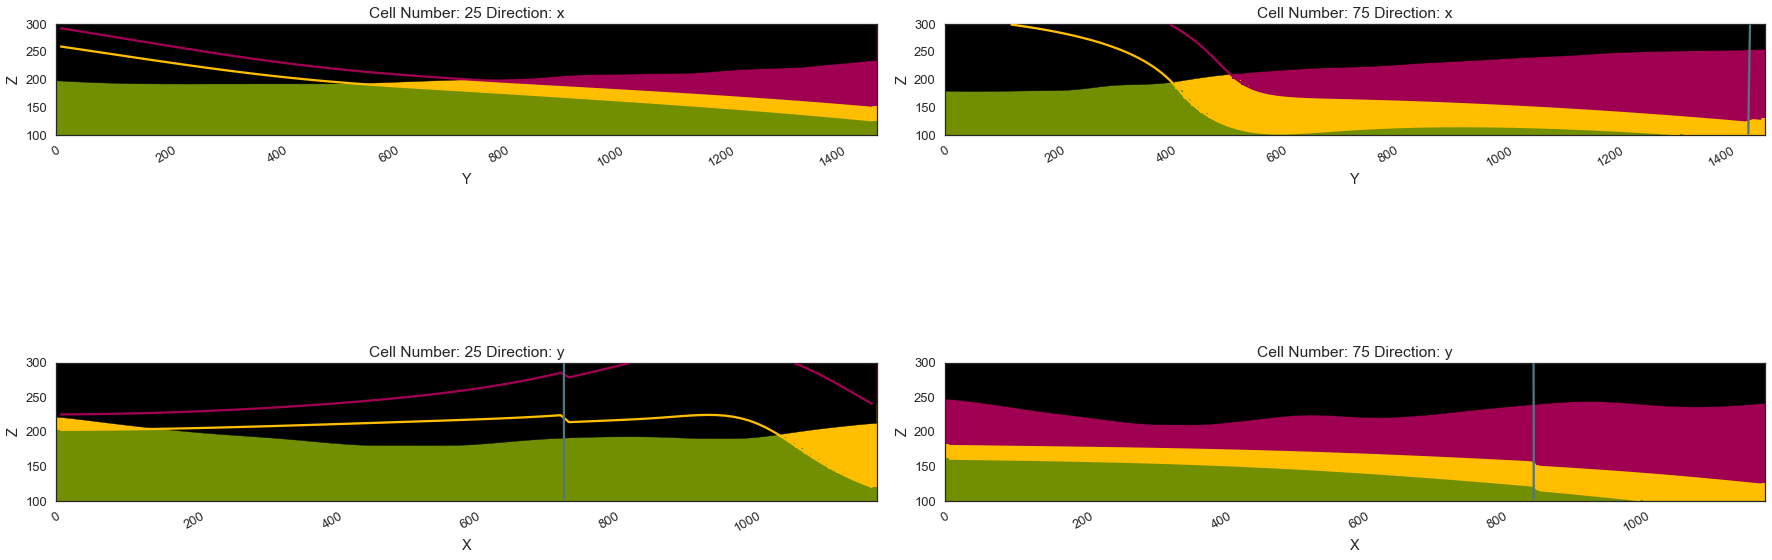

In [58]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], show_topography=True, show_data=False)

### Plotting 3D Model

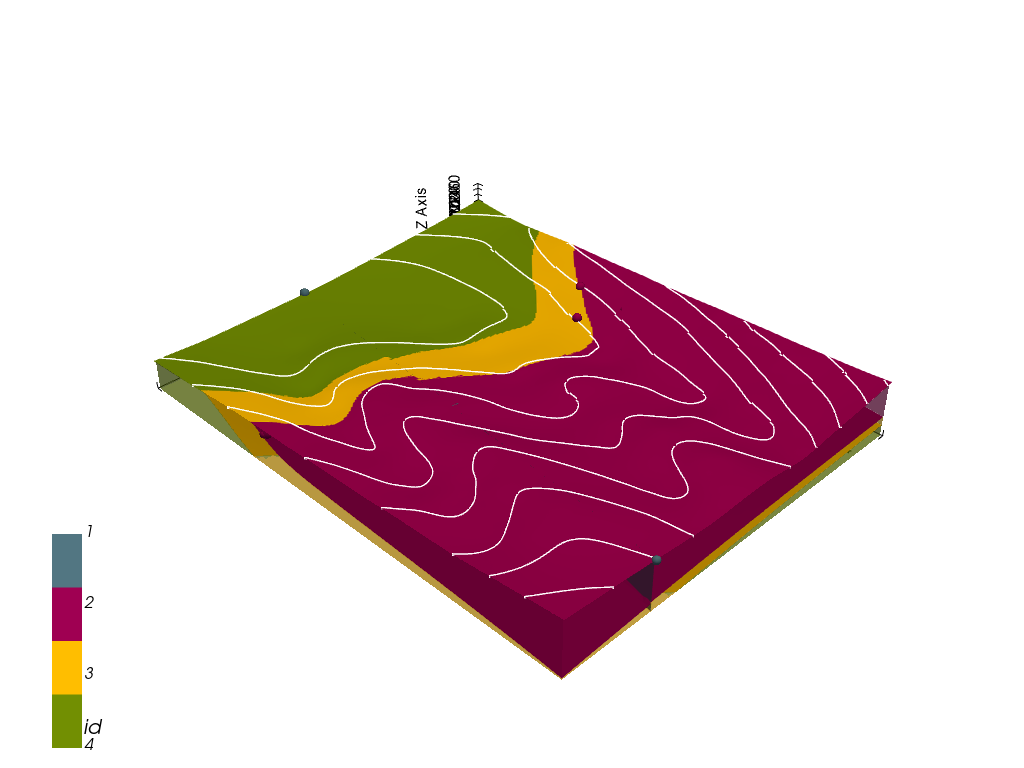

In [59]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)